# Assignment 6: Weather

In [20]:
# Assignment 6 — Weather

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
# Inspect the first 3 rows
df.head(3)


/tmp/ipykernel_5092/200340077.py:8: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [21]:
# Convert the date column
df["date"] = pd.to_datetime(df["date"])

/tmp/ipykernel_5092/3063838563.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


In [22]:
# Automatically extract the year and month
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day   # real day values

In [23]:
df["date"] = pd.to_datetime(df[["year", "month", "day"]])

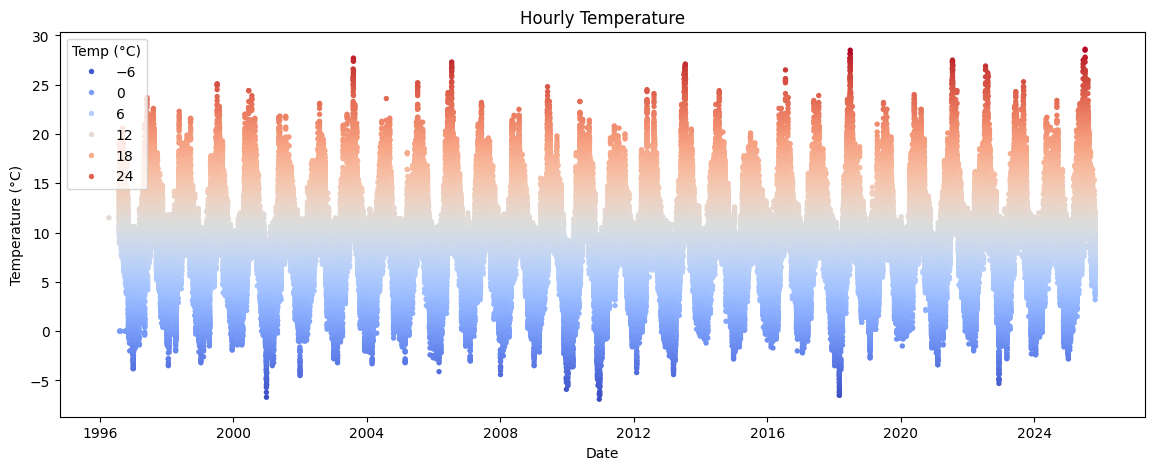

In [24]:
# Create the Temperature Plot
plt.figure(figsize=(14,5))

# Scatter with colormap based on temp
sns.scatterplot(
    data=df,
    x="date",
    y="temp",
    hue="temp",           # colour based on temperature
    palette="coolwarm",   # blue → red gradient
    s=15,                 # small point size for smooth look
    linewidth=0,
)

plt.title("Hourly Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(title="Temp (°C)", loc="best")
plt.show()

Below is a sample of code to show how the data can be used to gather more insight from the above graph.

In this example, I show how I can see the trend of hourly temperature from 10 AM 1st June to 3 PM 9th June 2023

In [25]:
start = '2023-06-01 10:00:00'
end = '2023-06-09 15:00:00'

df_filtered = df[(df['date'] >= start) & (df['date'] <= end)]

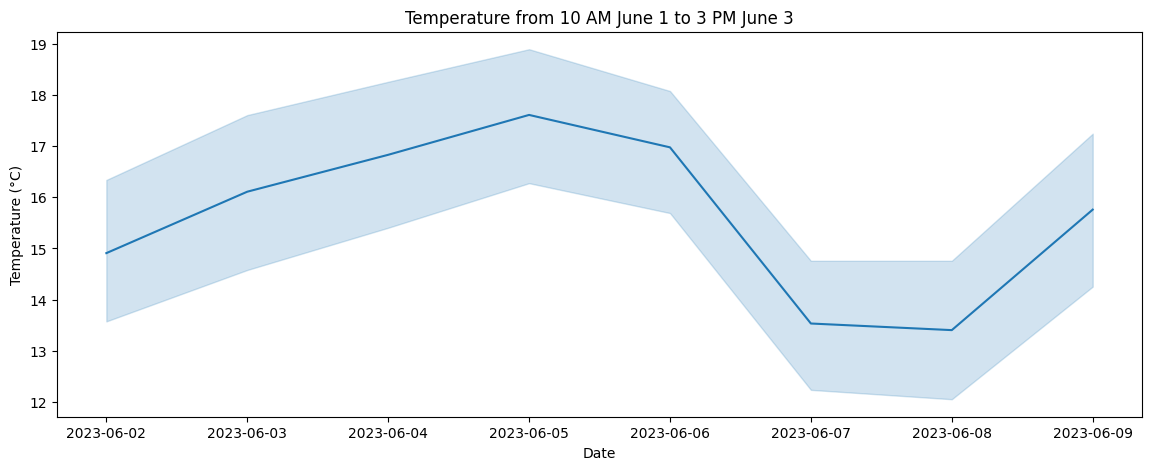

In [26]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_filtered, x='date', y='temp')
plt.title("Temperature from 10 AM June 1 to 3 PM June 3")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

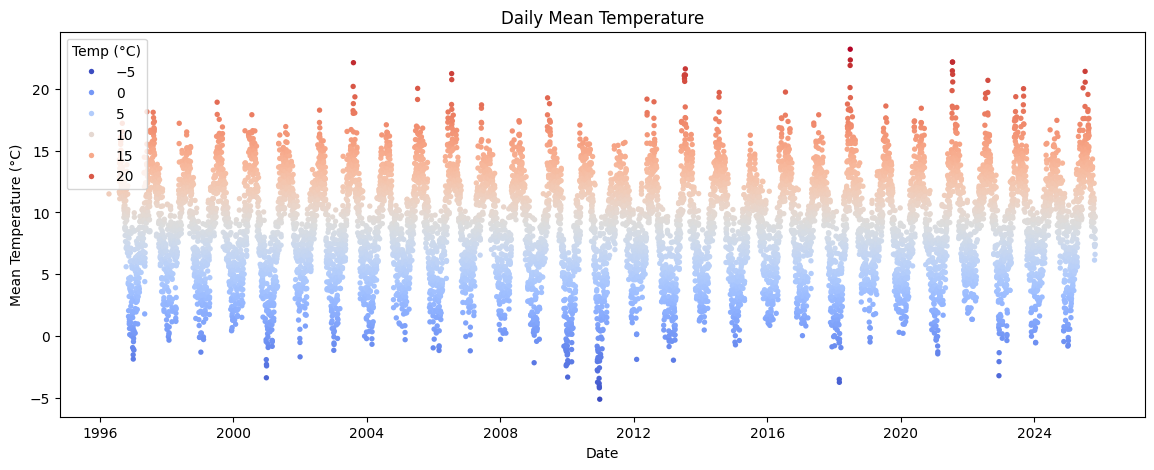

In [27]:
# Daily mean
df_daily = df.groupby(["year", "month", "day"])["temp"].mean().reset_index()
df_daily["date"] = pd.to_datetime(df_daily[["year", "month", "day"]])

# Create the Temperature Plot
plt.figure(figsize=(14,5))

# Scatter with colormap based on temp
sns.scatterplot(
    data=df_daily,
    x="date",
    y="temp",
    hue="temp",           # colour based on temperature
    palette="coolwarm",   # blue → red gradient
    s=15,                 # small point size for smooth look
    linewidth=0,
)

plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.legend(title="Temp (°C)", loc="best")
plt.show()

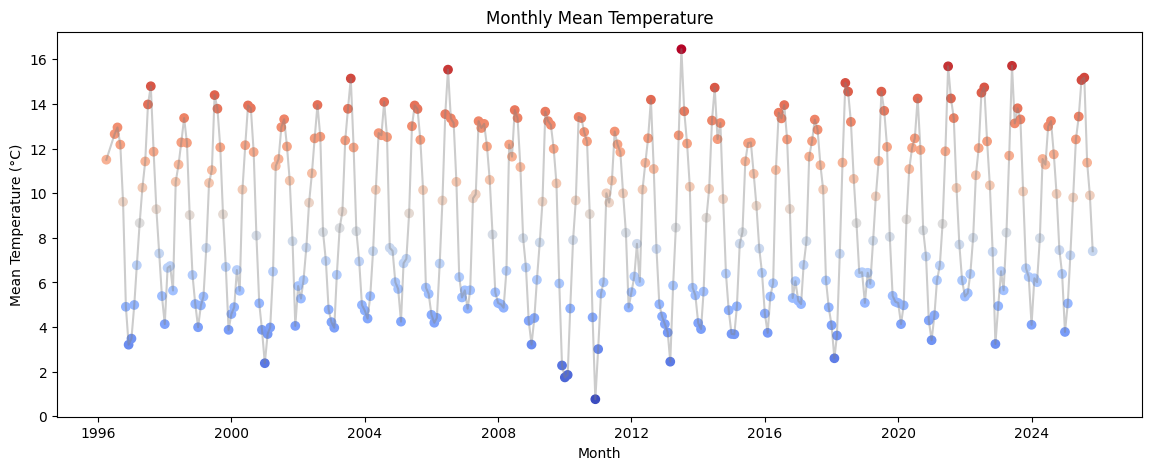

In [28]:
# Monthly mean
df_monthly = df.groupby(["year","month"])["temp"].mean().reset_index()
df_monthly["day"] = 1
df_monthly["date"] = pd.to_datetime(df_monthly[["year","month","day"]])

plt.figure(figsize=(14,5))

sns.lineplot(
    data=df_monthly,
    x="date",
    y="temp",
    color="grey",
    alpha=0.4
)

plt.scatter(
    df_monthly["date"],
    df_monthly["temp"],
    c=df_monthly["temp"],
    cmap="coolwarm"
)

plt.title("Monthly Mean Temperature")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.show()

1. Windspeed Plot (missing data automatically handled)

In [29]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [30]:
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
mean_wind = df['wdsp'].mean()
mean_wind

np.float64(9.457255522965552)

In [31]:
import numpy as np

# One day = 24 hours
x = np.linspace(-np.pi, np.pi, 24)

# Create a daily pattern: low at night, high mid-day
daily_pattern = (np.sin(x) * (mean_wind / 3)) + mean_wind

In [32]:
num_hours = len(df)
num_days = num_hours / 24
multiplier = (num_days * 2) - 1

x_full = np.linspace(-np.pi, multiplier * np.pi, num_hours)
wind_means = (np.sin(x_full) * (mean_wind / 3)) + mean_wind

In [33]:
rng = np.random.default_rng()

synthetic_wind = rng.poisson(lam=wind_means, size=num_hours)

In [34]:
df['wdsp_filled'] = df['wdsp']

missing_mask = df['wdsp_filled'].isna()

df.loc[missing_mask, 'wdsp_filled'] = synthetic_wind[missing_mask]

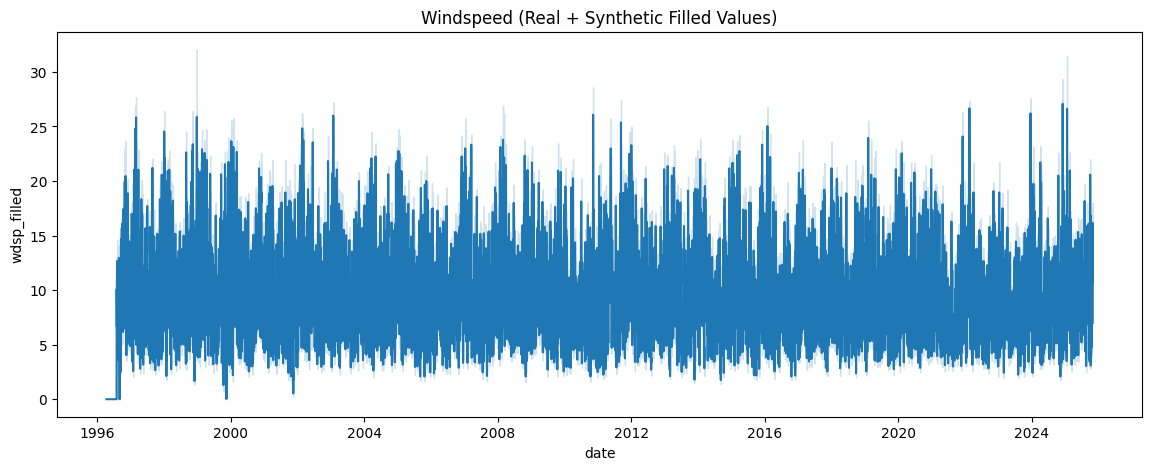

In [35]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x=df.index, y='wdsp_filled')
plt.title("Windspeed (Real + Synthetic Filled Values)")
plt.show()

2. Rolling Windspeed (24-hour window)

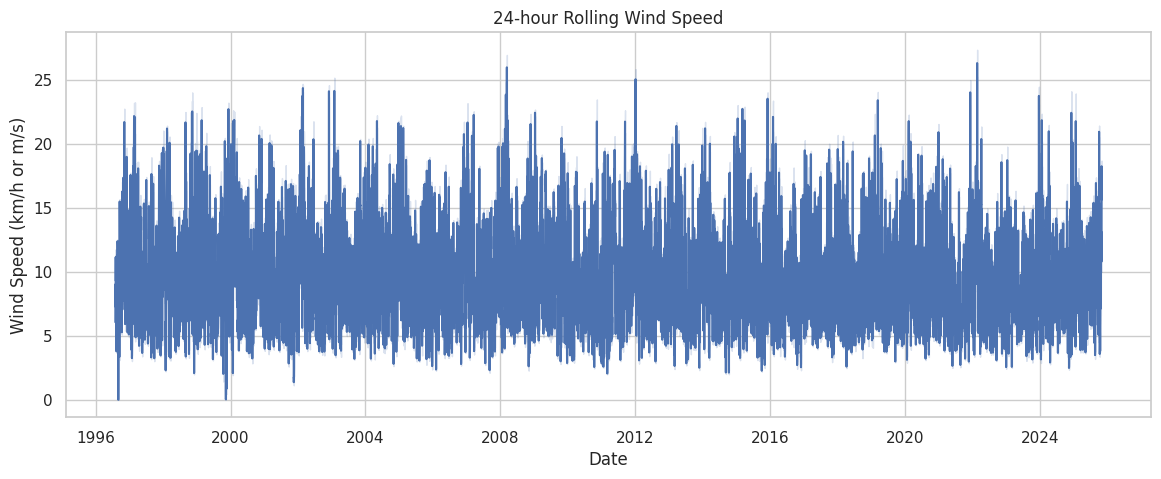

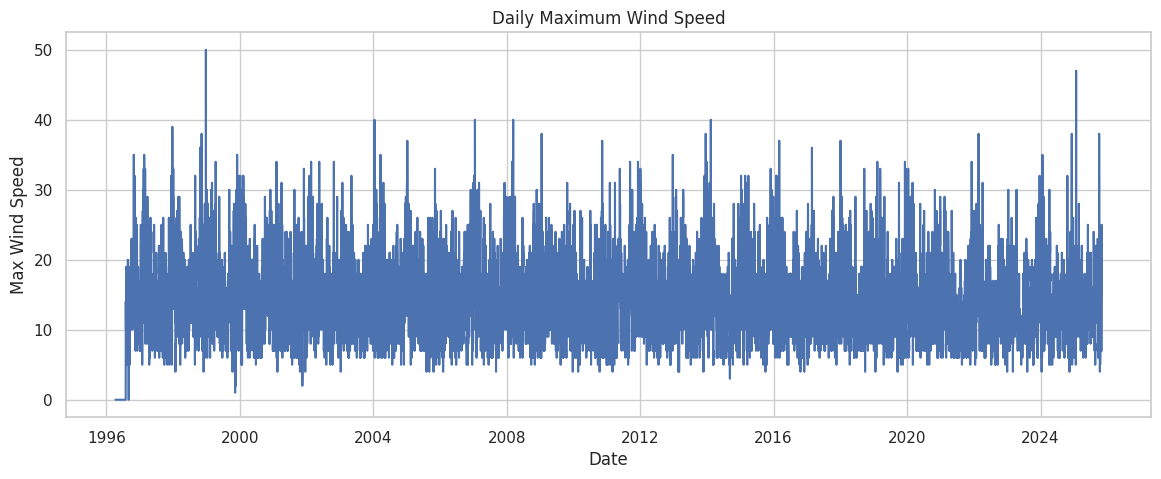

/tmp/ipykernel_5092/111412734.py:82: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_max = df_daily_max.resample('M', on='date')['max_wdsp'].mean().reset_index()


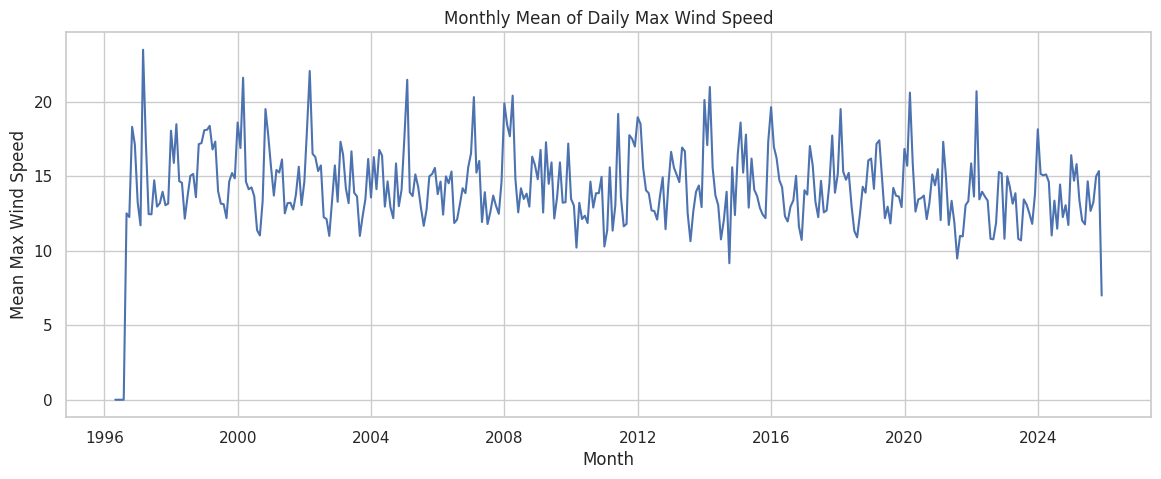

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Convert 'date' column to datetime if it exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Sort by date
if 'date' in df.columns:
    df = df.sort_values('date')
else:
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

# Convert wdsp to numeric
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# -----------------------------
# 2. Generate synthetic windspeed for missing values
# -----------------------------
mean_wind = df['wdsp'].mean()
num_hours = len(df)
num_days = num_hours / 24
multiplier = (num_days * 2) - 1

x_full = np.linspace(-np.pi, multiplier * np.pi, num_hours)
wind_means = (np.sin(x_full) * (mean_wind / 3)) + mean_wind

rng = np.random.default_rng()
synthetic_wind = rng.poisson(lam=wind_means, size=num_hours)

# Fill missing values
df['wdsp_filled'] = df['wdsp']
missing_mask = df['wdsp_filled'].isna()
df.loc[missing_mask, 'wdsp_filled'] = synthetic_wind[missing_mask]

# -----------------------------
# 3. Compute 24-hour rolling mean
# -----------------------------
df['wdsp_filled'] = pd.to_numeric(df['wdsp_filled'], errors='coerce')
rolling_wind = df['wdsp_filled'].rolling(window=24).mean()

# Reset index to avoid duplicate index issues in plotting
if df.index.name == 'date' or 'date' in df.columns:
    df_plot = df.reset_index()
else:
    df_plot = df.reset_index().rename(columns={'index':'date'})
df_plot['rolling_wind'] = rolling_wind.values

# -----------------------------
# 4. Plot 24-hour rolling windspeed
# -----------------------------
plt.figure(figsize=(14,5))
sns.lineplot(data=df_plot, x='date', y='rolling_wind')
plt.title("24-hour Rolling Wind Speed")
plt.xlabel("Date")
plt.ylabel("Wind Speed (km/h or m/s)")
plt.show()

# -----------------------------
# 5. Plot daily max windspeed
# -----------------------------
df_plot['date'] = pd.to_datetime(df_plot['date'])
df_daily_max = df_plot.groupby(df_plot['date'].dt.date)['wdsp_filled'].max().reset_index()
df_daily_max.rename(columns={'wdsp_filled':'max_wdsp'}, inplace=True)

plt.figure(figsize=(14,5))
sns.lineplot(data=df_daily_max, x='date', y='max_wdsp')
plt.title("Daily Maximum Wind Speed")
plt.xlabel("Date")
plt.ylabel("Max Wind Speed")
plt.show()

# -----------------------------
# 6. Plot monthly mean of daily max windspeed
# -----------------------------
df_daily_max['date'] = pd.to_datetime(df_daily_max['date'])
df_monthly_max = df_daily_max.resample('M', on='date')['max_wdsp'].mean().reset_index()

plt.figure(figsize=(14,5))
sns.lineplot(data=df_monthly_max, x='date', y='max_wdsp')
plt.title("Monthly Mean of Daily Max Wind Speed")
plt.xlabel("Month")
plt.ylabel("Mean Max Wind Speed")
plt.show()


4. Monthly Mean of Daily Max Windspeeds

Step 1: already computed daily max

Step 2: compute monthly mean of those daily values

In [ ]:
df_daily_max["date"] = pd.to_datetime(df_daily_max["date"])
df_daily_max["year"] = df_daily_max["date"].dt.year
df_daily_max["month"] = df_daily_max["date"].dt.month

df_monthly_mean = (
    df_daily_max.groupby(["year","month"])["max_wdsp"]
                 .mean()
                 .reset_index()
)

df_monthly_mean["day"] = 1
df_monthly_mean["date"] = pd.to_datetime(df_monthly_mean[["year","month","day"]])

plt.figure(figsize=(14,5))
sns.lineplot(data=df_monthly_mean, x="date", y="max_wdsp")
plt.title("Monthly Mean of Daily Maximum Windspeeds")
plt.xlabel("Month")
plt.ylabel("Monthly Mean of Daily Max Windspeeds (knots)")
plt.show()